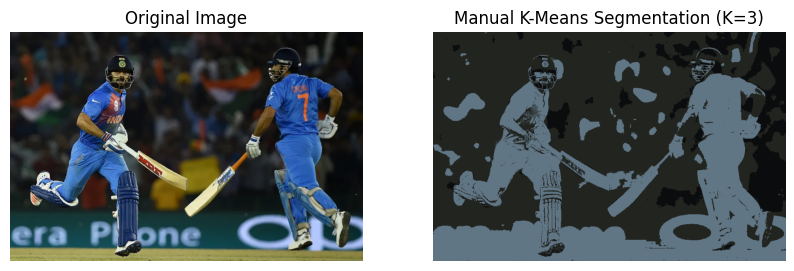

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\revaa\Downloads\mr.webp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image.reshape((-1, 3))  
pixels = np.float32(pixels)  
K = 3
np.random.seed(42) 
random_indices = np.random.choice(len(pixels), K, replace=False)
centers = pixels[random_indices]
max_iters = 100  
for _ in range(max_iters):
    distances = np.linalg.norm(pixels[:, np.newaxis] - centers, axis=2)  # Euclidean distance
    labels = np.argmin(distances, axis=1)  # Assign each pixel to the closest center
    new_centers = np.array([pixels[labels == k].mean(axis=0) if np.any(labels == k) else centers[k] for k in range(K)])
    if np.allclose(centers, new_centers, atol=1e-3):
        break
centers = new_centers  # Update centers
segmented_pixels = centers[labels]
segmented_image = segmented_pixels.reshape(image.shape)  # Reshape back to image
segmented_image = np.uint8(segmented_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"Manual K-Means Segmentation (K={K})")
plt.axis("off")
plt.show()


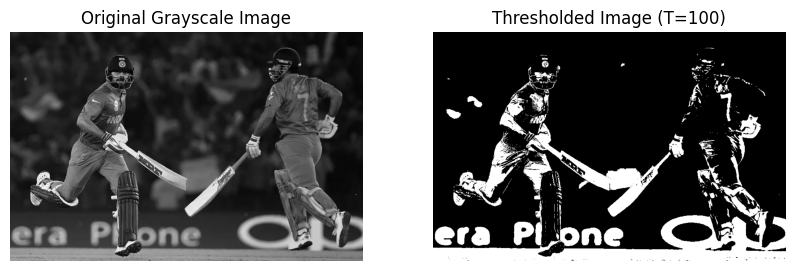

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # Using PIL to open the image
image = Image.open(r"C:\Users\revaa\Downloads\mr.webp").convert("L")  
image_np = np.array(image)  
threshold = 100 
binary_image = np.where(image_np > threshold, 255, 0)  
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap="gray")
plt.title(f"Thresholded Image (T={threshold})")
plt.axis("off")
plt.show()


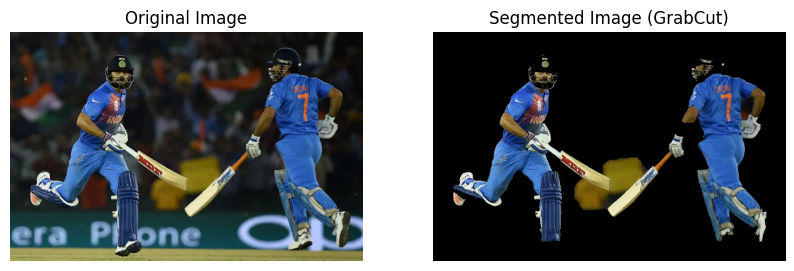

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\revaa\Downloads\mr.webp")  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
mask = np.zeros(image.shape[:2], np.uint8)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)
rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100)  # Adjust as needed
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
segmented_image = image * mask_final[:, :, np.newaxis]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (GrabCut)")
plt.axis("off")
plt.show()


(np.float64(-0.5), np.float64(899.5), np.float64(585.5), np.float64(-0.5))

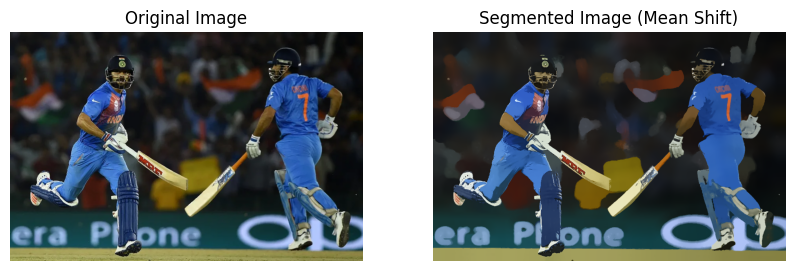

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\revaa\Downloads\mr.webp")  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
segmented_image = cv2.pyrMeanShiftFiltering(image, sp=20, sr=40)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (Mean Shift)")
plt.axis("off")


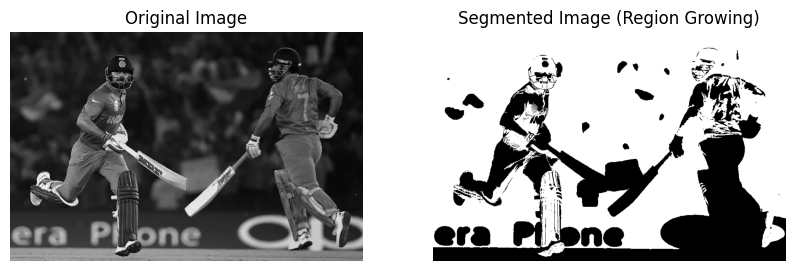

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
image_path =(r"C:\Users\revaa\Downloads\mr.webp")  # Use raw string for Windows paths
image = Image.open(image_path).convert("L")  # Convert to grayscale
image_np = np.array(image)
seed_x, seed_y = 150, 120 # Change as needed
threshold = 50
segmented = np.zeros_like(image_np, dtype=np.uint8)
stack = [(seed_x, seed_y)]
visited = set()  # To track visited pixels
height, width = image_np.shape
neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
while stack:
    x, y = stack.pop()
    if (x, y) in visited:
        continue
    visited.add((x, y))
    if abs(int(image_np[x, y]) - int(image_np[seed_x, seed_y])) < threshold:
        segmented[x, y] = 255  # Mark as foreground

        # Add neighbors to the stack
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            if 0 <= nx < height and 0 <= ny < width and (nx, ny) not in visited:
                stack.append((nx, ny))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap="gray")
plt.title("Segmented Image (Region Growing)")
plt.axis("off")
plt.show()
